In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

AttributeError: 'AxesSubplot' object has no attribute 'opts'

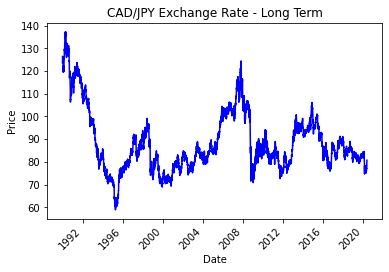

In [4]:
# Plot just the "Price" column from the dataframe:
cad_jpy_plot = cad_jpy_df.plot.line(title = "CAD/JPY Exchange Rate - Long Term",
                                      xlabel = "Date",
                                      ylabel = "Price",
                                      y = 'Price',
                                      rot = 45,
                                      color = 'blue',
                                      legend = False).opts(height = 400, width = 700)
cad_jpy_plot

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** 
Long term trend (over the last 3 decades)

Based on the above plot, the long term trend (over the last 3 decades) is for the Japanese Yen (JPY) to weaken compared to the Canadian Dollar.

Short term trend (over the last 3 years)

The short term trend (over the last 3 years) indicates some form of cyclical ups and downs. We can notice more sharper declines than gains.

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df['Price'])

In [6]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
exchange_rate_price_df = pd.DataFrame(cad_jpy_df['Price'])

# Noise column
exchange_rate_price_df['noise'] = ts_noise
# Trend column 
exchange_rate_price_df['trend'] = ts_trend 

exchange_rate_price_df.head()

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


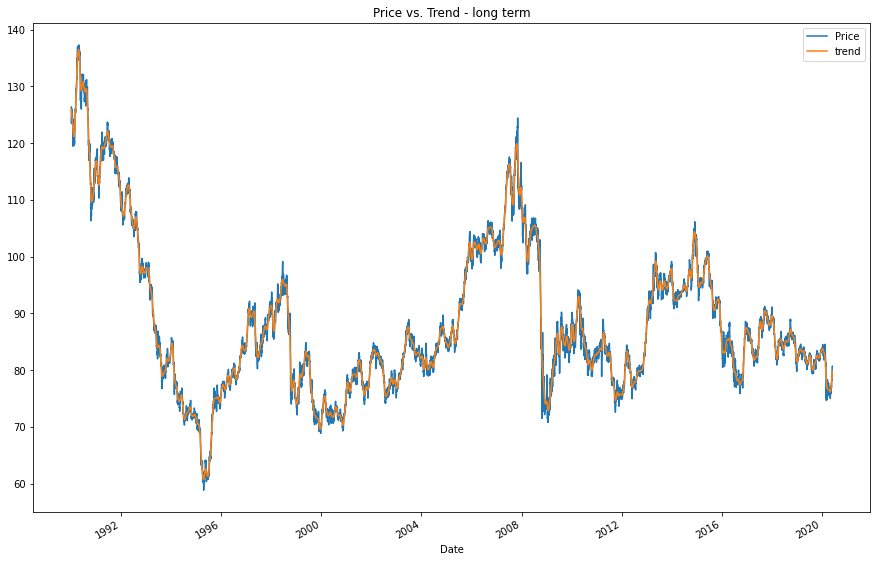

In [7]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
price_vs_ts_trend_plot = (exchange_rate_price_df['Price'].plot(figsize = (15,10),title = "Price vs. Trend - long term", legend = True),
                       exchange_rate_price_df['trend'].plot(legend = True))

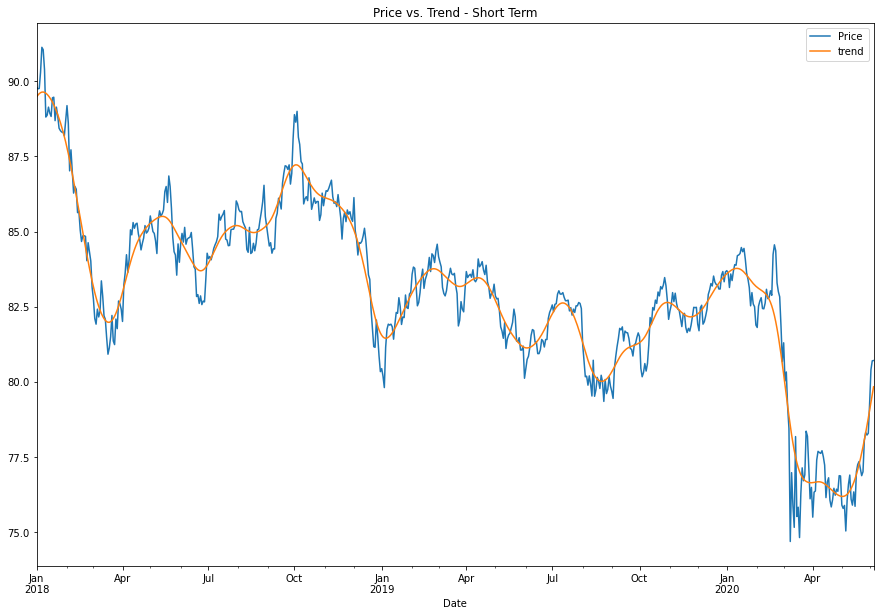

In [8]:
price_vs_ts_trend_plot_short = (exchange_rate_price_df.loc["2018-01-01":, :]['Price'].plot(figsize = (15,10),title = "Price vs. Trend - Short Term", legend = True),
                       exchange_rate_price_df.loc["2018-01-01":, :]['trend'].plot(legend = True))

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** YOUR ANSWER HERE

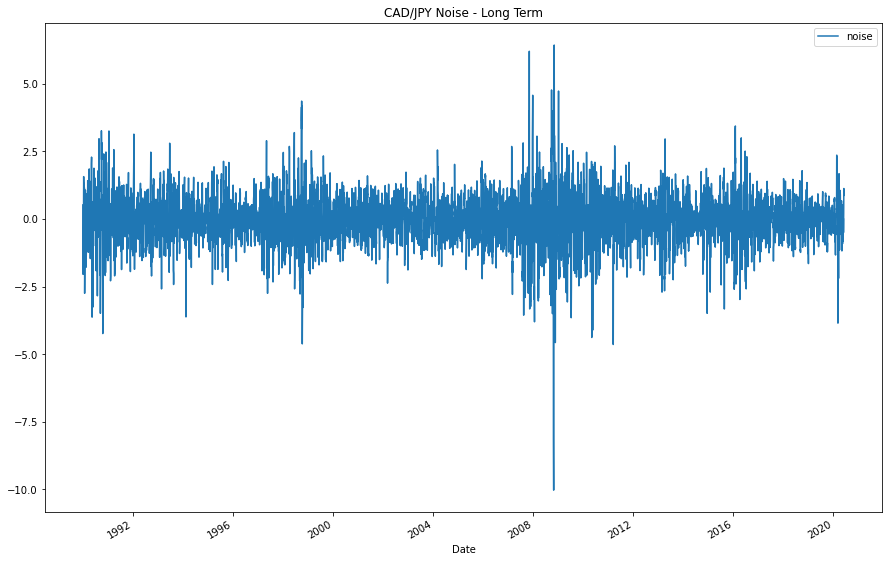

In [9]:
# Plot the Settle Noise
ts_noise_plot = exchange_rate_price_df['noise'].plot(figsize = (15, 10),
                              title = 'CAD/JPY Noise - Long Term', 
                              legend = True,
                             xlabel='Date',
                             )

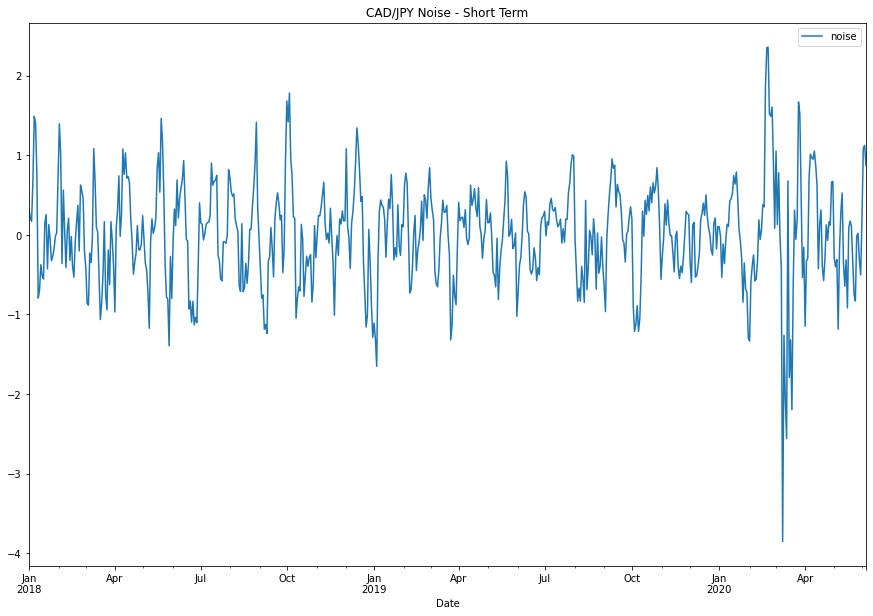

In [10]:
ts_noise_plot_short = exchange_rate_price_df.loc["2018-01-01":, :]['noise'].plot(figsize = (15, 10),
                              title = 'CAD/JPY Noise - Short Term', 
                              legend = True,
                             xlabel='Date',
                             )

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [11]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [18]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.SARIMAX 
# Estimate and ARMA model using statsmodels (use order=(2, 1))
model = ARIMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
results = model.fit()
results()

ModuleNotFoundError: No module named 'statsmodels.tsa.SARIMAX'

In [17]:
# Output model summary results:
results.summary()

NameError: name 'results' is not defined

In [13]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results.forecast(steps=5)[0]).hvplot.line(title = "5 Day Returns Forecast",co

SyntaxError: positional argument follows keyword argument (2093612568.py, line 2)

**Question:** Based on the p-value, is the model a good fit?

**Answer:** 

Based on the P Values of 0.807 indicated in the ARMA Model Summary indicated as well as the values of Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC); its quite clear that the mode is not a good fit.

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [19]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(cad_jpy_df['Price'], order=(5, 1, 1))


# Fit the model
results = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [20]:
# Output model summary results:
results.summary()

NameError: name 'results' is not defined

In [21]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=5)[0]).hvplot.line(title = "5 Day Futures Price Forecast",color = "blue")


NameError: name 'results' is not defined

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** Based on the plotted 5 day Price Forecast, we can see that the price of the Japanese Yen is set to appreciate (become stronger)


---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [22]:
import arch as arch

ModuleNotFoundError: No module named 'arch'

In [23]:
# Estimate a GARCH model:
model = arch.arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)


# Fit the model
results = model.fit()

NameError: name 'arch' is not defined

In [25]:
# Summarize the model results
results.summary()

NameError: name 'results' is not defined

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [26]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [27]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = results.forecast(start='2020-06-04', horizon = forecast_horizon)
forecasts

NameError: name 'results' is not defined

In [29]:
# Annualize the forecast
intermediate = np.sqrt(forecast.variance.dropna() * 252)
intermediate.head()

NameError: name 'forecast' is not defined

In [30]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

NameError: name 'intermediate' is not defined

In [31]:
# Plot the final forecast
final.hvplot.line(title = "5 Day Forecast of Volatility",
                  color = "red")

NameError: name 'final' is not defined

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** There is a clear indicator that the Volatility is set to increase in the 5 Day near term forecast

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

Based on the P Values of the anlysis and the predicted increase in Volatility based on the GARCH analysis; I would not be buying Yen now as it does not suit my investment goals.

2. Is the risk of the yen expected to increase or decrease?
Predicted increase in Volatility based on the GARCH analysis shows that the risk associated with the yen is expected to increase.

3. Based on the model evaluation, would you feel confident in using these models for Based on the P Values of the anlysis and the predicted increase in Volatility based on the GARCH analysis; I would not be confident in using these models for trading.